In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lgb
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix
import pandas as pd


#### loading dataset

In [61]:
# load dataset
trainData = pd.read_csv('../src/data/application_train.csv')

In [62]:
trainData.shape

(307511, 122)

In [63]:
trainData.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [64]:
pd.DataFrame(trainData.value_counts())

,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,0
SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,
100083,0,Cash loans,M,Y,Y,0,103500.0,573628.5,24435.0,463500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.009657,-15406,-892,-341.0,-4176,22.0,1,1,0,1,0,0,Laborers,2.0,2,2,MONDAY,18,0,0,0,0,0,0,Business Entity Type 3,0.270766,0.707126,0.597192,0.1464,0.1291,0.9861,0.8096,0.1080,0.040,0.0345,0.3333,0.3750,0.0000,0.1194,0.0933,0.0000,0.0000,0.1492,0.1340,0.9861,0.8171,0.1090,0.0403,0.0345,0.3333,0.3750,0.0000,0.1304,0.0972,0.0000,0.0000,0.1478,0.1291,0.9861,0.8121,0.1087,0.04,0.0345,0.3333,0.3750,0.0000,0.1214,0.0949,0.0000,0.0000,reg oper account,block of flats,0.1324,"Stone, brick",No,2.0,1.0,2.0,1.0,-2053.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0,1
338907,0,Cash loans,F,Y,Y,2,112500.0,315000.0,21181.5,315000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.015221,-14714,-2655,-1496.0,-735,7.0,1,1,0,1,0,0,Medicine staff,4.0,2,2,MONDAY,9,0,0,0,0,0,0,Medicine,0.376188,0.758812,0.513694,0.0165,0.0000,0.9767,0.6804,0.0015,0.000,0.0690,0.0417,0.0833,0.0226,0.0134,0.0141,0.0000,0.0000,0.0168,0.0000,0.9767,0.6929,0.0016,0.0000,0.0690,0.0417,0.0833,0.0231,0.0147,0.0147,0.0000,0.0000,0.0167,0.0000,0.9767,0.6847,0.0015,0.00,0.0690,0.0417,0.0833,0.0230,0.0137,0.0144,0.0000,0.0000,reg oper account,block of flats,0.0111,"Stone, brick",No,0.0,0.0,0.0,0.0,-1669.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0,1
339703,0,Cash loans,M,Y,N,0,270000.0,1507869.0,49135.5,1377000.0,Unaccompanied,Working,Higher education,Single / not married,House / apartment,0.008474,-15022,-7547,-3408.0,-2365,3.0,1,1,0,1,1,0,High skill tech staff,1.0,2,2,TUESDAY,11,0,0,0,0,0

#### Display class distribution

0: will repay on time
1: will have difficulty repaying loan


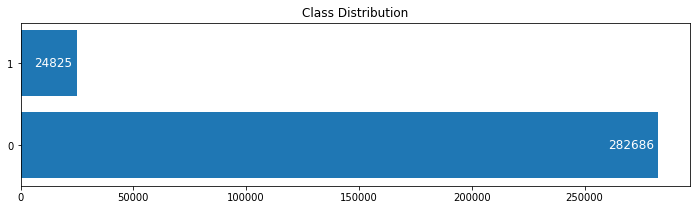

In [65]:
print("0: will repay on time")
print("1: will have difficulty repaying loan")

class_dist = trainData['TARGET'].value_counts()

plt.figure(figsize=(12,3))
plt.title('Class Distribution')
plt.barh(class_dist.index, class_dist.values)
plt.yticks([0, 1])

for i, value in enumerate(class_dist.values):
    plt.text(value-2000, i, str(value), fontsize=12, color='white',
             horizontalalignment='right', verticalalignment='center')

plt.show()

In [66]:
trainData['DAYS_BIRTH']

0         -9461
1        -16765
2        -19046
3        -19005
4        -19932
          ...  
307506    -9327
307507   -20775
307508   -14966
307509   -11961
307510   -16856
Name: DAYS_BIRTH, Length: 307511, dtype: int64

In [67]:
# a function to fix age representation
def convert_age(age_days_negative):
    age_days_positive = -age_days_negative
    age_years = age_days_positive/365
    return age_years

trainData['DAYS_BIRTH'] = trainData['DAYS_BIRTH'].apply(convert_age)
trainData['DAYS_EMPLOYED'] = trainData['DAYS_EMPLOYED'].apply(convert_age)

#### Displaying age distribution using kdeplot()

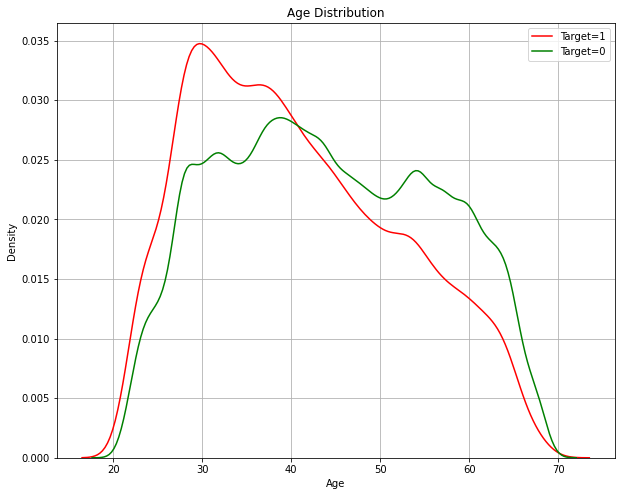

In [68]:
plt.figure(figsize=(10,8))
plt.title('Age Distribution')
plt.xlabel('Age')
sns.kdeplot(trainData[trainData['TARGET']==1]['DAYS_BIRTH'], label='Target=1', color='red')
sns.kdeplot(trainData[trainData['TARGET']==0]['DAYS_BIRTH'], label='Target=0', color ='green')
plt.legend()
plt.grid()
plt.show()

#### Features that we are going to use to train the model

In [69]:
used_features = [
    'TARGET',
    'NAME_CONTRACT_TYPE',
    'CODE_GENDER',
    'FLAG_OWN_CAR',
    'FLAG_OWN_REALTY',
    'CNT_CHILDREN',
    'AMT_INCOME_TOTAL',
    'AMT_CREDIT',
    'AMT_GOODS_PRICE',
    'NAME_INCOME_TYPE',
    'NAME_EDUCATION_TYPE',
    'DAYS_BIRTH',
    'DAYS_EMPLOYED',
    'CNT_FAM_MEMBERS',
    'EXT_SOURCE_1',
    'EXT_SOURCE_2',
    'EXT_SOURCE_3'
]

# Create a new data frame which only consists of those selected columns
reduced_trainData = trainData[used_features]

#### Displaying correlation matrix based on reduced_trainData

/tmp/ipykernel_7997/3564673906.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(reduced_trainData.corr(), annot=True, cmap='RdBu')


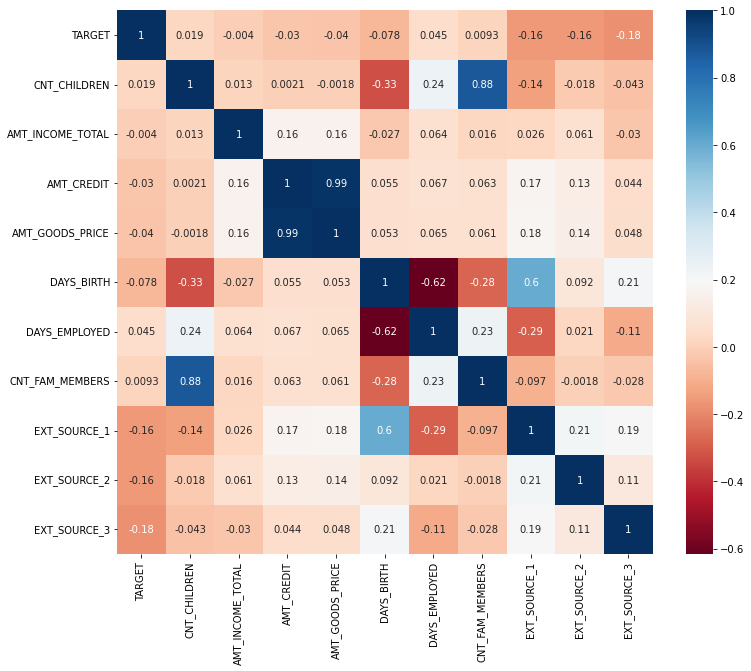

In [70]:
plt.figure(figsize=(12,10))
sns.heatmap(reduced_trainData.corr(), annot=True, cmap='RdBu')
plt.show()

In [71]:
reduced_trainData.dtypes

TARGET                   int64
NAME_CONTRACT_TYPE      object
CODE_GENDER             object
FLAG_OWN_CAR            object
FLAG_OWN_REALTY         object
CNT_CHILDREN             int64
AMT_INCOME_TOTAL       float64
AMT_CREDIT             float64
AMT_GOODS_PRICE        float64
NAME_INCOME_TYPE        object
NAME_EDUCATION_TYPE     object
DAYS_BIRTH             float64
DAYS_EMPLOYED          float64
CNT_FAM_MEMBERS        float64
EXT_SOURCE_1           float64
EXT_SOURCE_2           float64
EXT_SOURCE_3           float64
dtype: object

#### Displaying the number of unique values in each column

In [72]:
for column in reduced_trainData.columns:
    print("{}\t: {}".format(column, len(np.unique(reduced_trainData[column]))))

TARGET	: 2
NAME_CONTRACT_TYPE	: 2
CODE_GENDER	: 3
FLAG_OWN_CAR	: 2
FLAG_OWN_REALTY	: 2
CNT_CHILDREN	: 15
AMT_INCOME_TOTAL	: 2548
AMT_CREDIT	: 5603
AMT_GOODS_PRICE	: 1003
NAME_INCOME_TYPE	: 8
NAME_EDUCATION_TYPE	: 5
DAYS_BIRTH	: 17460
DAYS_EMPLOYED	: 12574
CNT_FAM_MEMBERS	: 18
EXT_SOURCE_1	: 114585
EXT_SOURCE_2	: 119832
EXT_SOURCE_3	: 815


In [73]:
reduced_trainData['TARGET'].head()

0    1
1    0
2    0
3    0
4    0
Name: TARGET, dtype: int64

#### A function to convert categorical data into one-hot representation (more than 2 categories)

In [74]:
columns = ['CODE_GENDER', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE']

def create_one_hot(reduced_trainData, columns):
    for column in columns:
        reduced_trainData = pd.concat([reduced_trainData, pd.get_dummies(trainData[column])], axis=1, join='inner')
        reduced_trainData = reduced_trainData.drop([column], axis=1)
    
    return reduced_trainData

reduced_trainData = create_one_hot(reduced_trainData, columns)

### Using label encoder to encode columns which consists of only 2 categories

In [75]:
le_name_contract_type = LabelEncoder()
reduced_trainData['NAME_CONTRACT_TYPE'] = le_name_contract_type.fit_transform(reduced_trainData['NAME_CONTRACT_TYPE'])

le_flag_own_car = LabelEncoder()
reduced_trainData['FLAG_OWN_CAR'] = le_flag_own_car.fit_transform(reduced_trainData['FLAG_OWN_CAR'])

le_flag_own_realty = LabelEncoder()
reduced_trainData['FLAG_OWN_REALTY'] = le_flag_own_realty.fit_transform(reduced_trainData['FLAG_OWN_REALTY'])

#### total of missing values by columns

In [76]:
df =  pd.DataFrame(reduced_trainData.isnull().sum() != 0 )
df

,0
TARGET,False
NAME_CONTRACT_TYPE,False
FLAG_OWN_CAR,False
FLAG_OWN_REALTY,False
CNT_CHILDREN,False
AMT_INCOME_TOTAL,False
AMT_CREDIT,False
AMT_GOODS_PRICE,True
DAYS_BIRTH,False
DAYS_EMPLOYED,False


In [77]:
reduced_trainData.isnull().sum()

TARGET                                0
NAME_CONTRACT_TYPE                    0
FLAG_OWN_CAR                          0
FLAG_OWN_REALTY                       0
CNT_CHILDREN                          0
AMT_INCOME_TOTAL                      0
AMT_CREDIT                            0
AMT_GOODS_PRICE                     278
DAYS_BIRTH                            0
DAYS_EMPLOYED                         0
CNT_FAM_MEMBERS                       2
EXT_SOURCE_1                     173378
EXT_SOURCE_2                        660
EXT_SOURCE_3                      60965
F                                     0
M                                     0
XNA                                   0
Businessman                           0
Commercial associate                  0
Maternity leave                       0
Pensioner                             0
State servant                         0
Student                               0
Unemployed                            0
Working                               0


In [78]:
# print variables with missing data only
for i in range (reduced_trainData.shape[1]):
    if reduced_trainData.isnull().sum()[i] !=0 :
        print(reduced_trainData.isnull().sum().index[i]) 

AMT_GOODS_PRICE
CNT_FAM_MEMBERS
EXT_SOURCE_1
EXT_SOURCE_2
EXT_SOURCE_3


#### Filling missing values with the mean of the corresponding column

In [79]:
reduced_trainData.loc[:,'AMT_GOODS_PRICE'] = reduced_trainData['AMT_GOODS_PRICE'].fillna(reduced_trainData['AMT_GOODS_PRICE'].mean())
reduced_trainData.loc[:,'CNT_FAM_MEMBERS'] = reduced_trainData['CNT_FAM_MEMBERS'].fillna(reduced_trainData['CNT_FAM_MEMBERS'].mean())
reduced_trainData.loc[:,'EXT_SOURCE_1'] = reduced_trainData['EXT_SOURCE_1'].fillna(reduced_trainData['EXT_SOURCE_1'].mean())
reduced_trainData.loc[:,'EXT_SOURCE_2'] = reduced_trainData['EXT_SOURCE_2'].fillna(reduced_trainData['EXT_SOURCE_2'].mean())
reduced_trainData.loc[:,'EXT_SOURCE_3'] = reduced_trainData['EXT_SOURCE_3'].fillna(reduced_trainData['EXT_SOURCE_3'].mean())

In [80]:
#### Export preprocessed data 
reduced_trainData.to_csv('data_pp.csv', index=False)

#### Split the data into train/test

In [81]:
X = reduced_trainData.iloc[:,1:].values
y = reduced_trainData['TARGET'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=22)

#### Value normalization

In [82]:
min_max_scaler = MinMaxScaler()
X_train_scaled = min_max_scaler.fit_transform(X_train)
X_test_scaled = min_max_scaler.fit_transform(X_test)

#### Initializing and Training LightGBM classifier model

In [83]:
# initialize
model = lgb.LGBMClassifier(n_estimators=100, class_weight='balanced', random_state=22)

# train
model.fit(X_train_scaled, y_train, eval_metric='auc', 
          eval_set=[(X_train_scaled, y_train),(X_test_scaled, y_test)])

[1]	training's auc: 0.720302	training's binary_logloss: 0.67919	valid_1's auc: 0.698408	valid_1's binary_logloss: 0.674458
[2]	training's auc: 0.725461	training's binary_logloss: 0.667546	valid_1's auc: 0.70527	valid_1's binary_logloss: 0.658787
[3]	training's auc: 0.729103	training's binary_logloss: 0.657915	valid_1's auc: 0.707951	valid_1's binary_logloss: 0.645931
[4]	training's auc: 0.730349	training's binary_logloss: 0.649822	valid_1's auc: 0.708751	valid_1's binary_logloss: 0.634992
[5]	training's auc: 0.732515	training's binary_logloss: 0.642855	valid_1's auc: 0.710744	valid_1's binary_logloss: 0.625352
[6]	training's auc: 0.734179	training's binary_logloss: 0.636945	valid_1's auc: 0.712949	valid_1's binary_logloss: 0.617149
[7]	training's auc: 0.735988	training's binary_logloss: 0.631777	valid_1's auc: 0.715989	valid_1's binary_logloss: 0.611428
[8]	training's auc: 0.737053	training's binary_logloss: 0.627348	valid_1's auc: 0.717967	valid_1's binary_logloss: 0.606358
[9]	traini

LGBMClassifier(class_weight='balanced', random_state=22)

#### save model

In [84]:
from joblib import dump
dump(min_max_scaler, 'minMax_scaler_credits.joblib')

['minMax_scaler_credits.joblib']

In [85]:
import joblib
# save model
joblib.dump(model,'lgb_credits.joblib')

# load model
#gbm_pickle = joblib.load('lgb.joblib')

['lgb_credits.joblib']

#### Predict the probability score

In [91]:
prob_train = model.predict_proba(X_train_scaled)
prob_test = model.predict_proba(X_test_scaled)
print(prob_train)

[[0.75499421 0.24500579]
 [0.78772917 0.21227083]
 [0.59107248 0.40892752]
 ...
 [0.73127706 0.26872294]
 [0.59484319 0.40515681]
 [0.80053172 0.19946828]]


#### precision

In [87]:
model.score(X_test_scaled, y_test)

0.7585848074921956

#### ROC

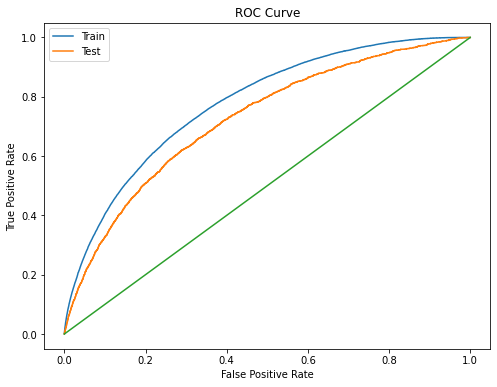

In [88]:
# Create train and test curve
fpr_train, tpr_train, thresh_train = roc_curve(y_train, prob_train[:,1])
fpr_test, tpr_test, thresh_test = roc_curve(y_test, prob_test[:,1])

# Create the straight line (how the graph looks like if the model does random guess instead)
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs)

# Plot the model
plt.figure(figsize=(8,6))
plt.title('ROC Curve')
plt.plot(fpr_train, tpr_train, label='Train')
plt.plot(fpr_test, tpr_test, label='Test')
plt.plot(p_fpr, p_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

#### Confusion  Matrix    

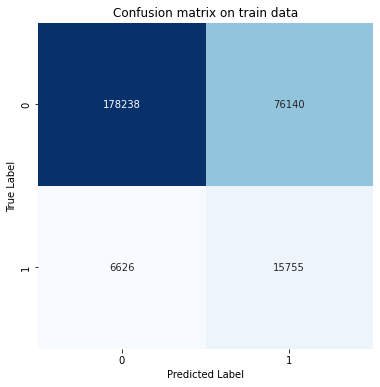

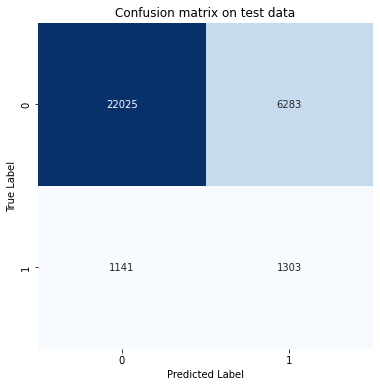

In [89]:
# Predict train and test data
pred_train = model.predict(X_train_scaled)
pred_test = model.predict(X_test_scaled)

# Constructing the confusion matrix based on train data
cm_train = confusion_matrix(y_train, pred_train)

# Display the train confusion matrix
plt.figure(figsize=(6,6))
plt.title('Confusion matrix on train data')
sns.heatmap(cm_train, annot=True, fmt='d', cmap=plt.cm.Blues, cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Constructing the confusion matrix based on test data
cm_test = confusion_matrix(y_test, pred_test)

# Display the test confusion matrix
plt.figure(figsize=(6,6))
plt.title('Confusion matrix on test data')
sns.heatmap(cm_test, annot=True, fmt='d', cmap=plt.cm.Blues, cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

#### save model

In [92]:
import joblib
joblib.dump(model, '../src/model/lgb_credit.joblib')

['../src/model/lgb_credit.joblib']

#### load model

In [ ]:
# from joblib import load
# scaler = load('scaler_filename.joblib')
# transformed_data = scaler.transform(new_data)

In [ ]:
trainData.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [93]:
print(model.feature_importances_)

[ 56  61  16  22 193 350 275 366 235  41 422 376 353  44  28   0   0  15
   0   4  16   0   2  27   6  42   6  10  34]


In [ ]:
import sphynx